In [ ]:
#!pip install tensorflow
#!pip install mdtraj
#!conda install -y -c conda-forge pdbfixer
#!conda install -y boost-cpp boost py-boost
#!pip install git+https://github.com/samoturk/mol2vec
#!pip install matminer
#!pip install mordred
#!pip install networkx[default]
#!conda install -y -c conda-forge openmm
#!pip install pymatgen
#! pip install deepchem==2.4
#!conda install -y -c rdkit rdkit
#!pip install biopython

In [1]:
import tensorflow
import sklearn as sk
import numpy as np
import rdkit # 
# https://www.rdkit.org/docs/index.html
from IPython.display import Image

2023-03-15 23:41:42.662233: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import deepchem as dc
#https://deepchem.io/
# import image module
from IPython.display import Image
from Bio import SeqIO
# https://biopython.org/

# Install Needed Libraries

## Intro to DeepChem

In [3]:
x = np.random.random((4, 5))
y = np.random.random((4, 1))

In [4]:
x

array([[0.72768708, 0.59650131, 0.01003161, 0.19081709, 0.69420501],
       [0.57568536, 0.40047665, 0.91044519, 0.60929724, 0.77755249],
       [0.9885636 , 0.341729  , 0.60486537, 0.35384513, 0.69644609],
       [0.26151538, 0.35420079, 0.79083103, 0.8382652 , 0.53511377]])

In [5]:
y

array([[0.71698742],
       [0.0179591 ],
       [0.6071216 ],
       [0.34722328]])

In [6]:
dataset = dc.data.NumpyDataset(x, y)

In [7]:
print(dataset.X)

[[0.72768708 0.59650131 0.01003161 0.19081709 0.69420501]
 [0.57568536 0.40047665 0.91044519 0.60929724 0.77755249]
 [0.9885636  0.341729   0.60486537 0.35384513 0.69644609]
 [0.26151538 0.35420079 0.79083103 0.8382652  0.53511377]]


In [8]:
print(dataset.y)

[[0.71698742]
 [0.0179591 ]
 [0.6071216 ]
 [0.34722328]]


## Featurizing Data

In [9]:
# https://deepchem.readthedocs.io/en/latest/api_reference/featurizers.html?highlight=feat

## SMILES

Circular fingerprints:
the representation of molecular structures by atom neighborhoods -- have been applied to a wide range of applications, such as similarity searching and the prediction of absorption, distribution, metabolism, excretion and toxicity properties.

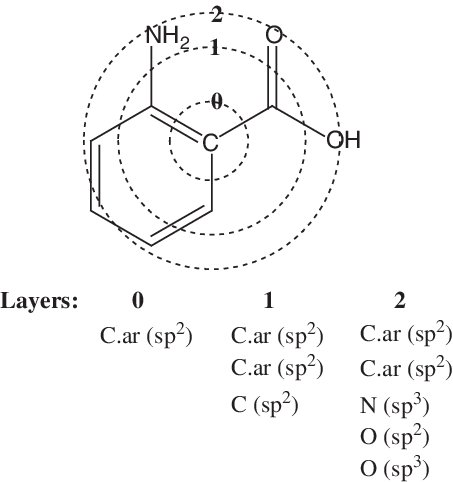

In [11]:
Image('assets/Circular-fingerprints-with-Sybyl-mol2-atom-typing-An-individual-fingerprint-is_W640.jpg')

In [12]:
smiles = [
  'O=Cc1ccc(O)c(OC)c1', 
  'CN1CCC[C@H]1c2cccnc2',
  'C1CCCCC1',
  'c1ccccc1',
  'CC(=O)O',
]
properties = [0.4, -1.5, 3.2, -0.2, 1.7]
featurizer = dc.feat.CircularFingerprint(size=1024)
ecfp = featurizer.featurize(smiles)
ecfp.shape
(5, 1024)
dataset = dc.data.NumpyDataset(X=ecfp, y=np.array(properties))
len(dataset)

5

In [14]:
ecfp.shape

(5, 1024)

## Proteins

In [19]:
codes = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
         'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
print(f'# number of possible AA={len(codes)}')

# number of possible AA=20


In [20]:
path_to_file = 'data/rcsb_pdb_8BIC.fasta'
with open(path_to_file, mode='r') as handle:

    # Use Biopython's parse function to process individual
    # FASTA records (thus reducing memory footprint)
    for record in SeqIO.parse(handle, 'fasta'):

        # Extract individual parts of the FASTA record
        identifier = record.id
        description = record.description
        sequence = record.seq

        # Example: adapt to extract features you are interested in
        print('----------------------------------------------------------')
        print('Processing the record {}:'.format(identifier))
        print('Its description is: \n{}'.format(description))
        amount_of_nucleotides = len(sequence)
        print('Its sequence contains {} nucleotides.'.format(amount_of_nucleotides))

----------------------------------------------------------
Processing the record 8BIC_1|Chains:
Its description is: 
8BIC_1|Chains A, B|methyltransferase Plu4891|Photorhabdus luminescens (29488)
Its sequence contains 335 nucleotides.


In [22]:
seq_list  = str(sequence)
print(f'Sequences = {seq_list}')

Sequences = MRGSHHHHHHENLYFQGSMLIDLITSCRKSTVIYAFVDMGLSVHFKDGACVNISELASQYGLDHSRFSRLCEYLIKIGVLVSCNEGVALSEECSALADPESMESLMIRCEVSPEYWKAWSMYSKSLYENNSKTAFEIAHGKPFFEYLDHHELFRSNFDSFMSKNSDKIIEKLLDIYDFSQHNRILDVGGGEGNLLIRINEKIKGKHYAVLDRYNETPVLEDIEFINGDFFKLVPSGYDLYILKNVIHNWSDSNAILILENCRKAMDDNATILLIGTVKKLKLEIIDSTDILMDVLLLGKERYLNELEDLAHQAGFVVKDIKEINEKYSIIELGVK


In [18]:
max_seq = 500
codes = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
         'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
# Approach 1 
OneHotFeaturizer = dc.feat.OneHotFeaturizer(codes, max_length=max_seq)
features = OneHotFeaturizer.featurize(seq_list)



[23:44:14] SMILES Parse Error: syntax error while parsing: MRGSHHHHHHENLYFQGSMLIDLITSCRKSTVIYAFVDMGLSVHFKDGACVNISELASQYGLDHSRFSRLCEYLIKIGVLVSCNEGVALSEECSALADPESMESLMIRCEVSPEYWKAWSMYSKSLYENNSKTAFEIAHGKPFFEYLDHHELFRSNFDSFMSKNSDKIIEKLLDIYDFSQHNRILDVGGGEGNLLIRINEKIKGKHYAVLDRYNETPVLEDIEFINGDFFKLVPSGYDLYILKNVIHNWSDSNAILILENCRKAMDDNATILLIGTVKKLKLEIIDSTDILMDVLLLGKERYLNELEDLAHQAGFVVKDIKEINEKYSIIELGVK
[23:44:14] SMILES Parse Error: Failed parsing SMILES 'MRGSHHHHHHENLYFQGSMLIDLITSCRKSTVIYAFVDMGLSVHFKDGACVNISELASQYGLDHSRFSRLCEYLIKIGVLVSCNEGVALSEECSALADPESMESLMIRCEVSPEYWKAWSMYSKSLYENNSKTAFEIAHGKPFFEYLDHHELFRSNFDSFMSKNSDKIIEKLLDIYDFSQHNRILDVGGGEGNLLIRINEKIKGKHYAVLDRYNETPVLEDIEFINGDFFKLVPSGYDLYILKNVIHNWSDSNAILILENCRKAMDDNATILLIGTVKKLKLEIIDSTDILMDVLLLGKERYLNELEDLAHQAGFVVKDIKEINEKYSIIELGVK' for input: 'MRGSHHHHHHENLYFQGSMLIDLITSCRKSTVIYAFVDMGLSVHFKDGACVNISELASQYGLDHSRFSRLCEYLIKIGVLVSCNEGVALSEECSALADPESMESLMIRCEVSPEYWKAWSMYSKSLYENNSKTAFEIAHGKPFFEYLDHHELFRSNFDSFMSKNSDKIIEKLLDIYDFSQHNRILDVGGGEGNLLIRINEKI

In [24]:
# Appraoch 2 
indinces = [codes.index(s) for s in sequence]
print(indinces)
onhot_mat = np.zeros((len(sequence), len(codes)))
onhot_mat[np.arange(len(sequence)), indinces]=1
print(onhot_mat)

[10, 14, 5, 15, 6, 6, 6, 6, 6, 6, 3, 11, 9, 19, 4, 13, 5, 15, 10, 9, 7, 2, 9, 7, 16, 15, 1, 14, 8, 15, 16, 17, 7, 19, 0, 4, 17, 2, 10, 5, 9, 15, 17, 6, 4, 8, 2, 5, 0, 1, 17, 11, 7, 15, 3, 9, 0, 15, 13, 19, 5, 9, 2, 6, 15, 14, 4, 15, 14, 9, 1, 3, 19, 9, 7, 8, 7, 5, 17, 9, 17, 15, 1, 11, 3, 5, 17, 0, 9, 15, 3, 3, 1, 15, 0, 9, 0, 2, 12, 3, 15, 10, 3, 15, 9, 10, 7, 14, 1, 3, 17, 15, 12, 3, 19, 18, 8, 0, 18, 15, 10, 19, 15, 8, 15, 9, 19, 3, 11, 11, 15, 8, 16, 0, 4, 3, 7, 0, 6, 5, 8, 12, 4, 4, 3, 19, 9, 2, 6, 6, 3, 9, 4, 14, 15, 11, 4, 2, 15, 4, 10, 15, 8, 11, 15, 2, 8, 7, 7, 3, 8, 9, 9, 2, 7, 19, 2, 4, 15, 13, 6, 11, 14, 7, 9, 2, 17, 5, 5, 5, 3, 5, 11, 9, 9, 7, 14, 7, 11, 3, 8, 7, 8, 5, 8, 6, 19, 0, 17, 9, 2, 14, 19, 11, 3, 16, 12, 17, 9, 3, 2, 7, 3, 4, 7, 11, 5, 2, 4, 4, 8, 9, 17, 12, 15, 5, 19, 2, 9, 19, 7, 9, 8, 11, 17, 7, 6, 11, 18, 15, 2, 15, 11, 0, 7, 9, 7, 9, 3, 11, 1, 14, 8, 0, 10, 2, 2, 11, 0, 16, 7, 9, 9, 7, 5, 16, 17, 8, 8, 9, 8, 9, 3, 7, 7, 2, 15, 16, 2, 7, 9, 10, 2, 17, 9, 9, 9

In [25]:
# Reverse 
''.join([codes[i] for i in onhot_mat.argmax(axis=-1).tolist()])

'MRGSHHHHHHENLYFQGSMLIDLITSCRKSTVIYAFVDMGLSVHFKDGACVNISELASQYGLDHSRFSRLCEYLIKIGVLVSCNEGVALSEECSALADPESMESLMIRCEVSPEYWKAWSMYSKSLYENNSKTAFEIAHGKPFFEYLDHHELFRSNFDSFMSKNSDKIIEKLLDIYDFSQHNRILDVGGGEGNLLIRINEKIKGKHYAVLDRYNETPVLEDIEFINGDFFKLVPSGYDLYILKNVIHNWSDSNAILILENCRKAMDDNATILLIGTVKKLKLEIIDSTDILMDVLLLGKERYLNELEDLAHQAGFVVKDIKEINEKYSIIELGVK'

## Datasets 

The DeepChem library is packaged alongside the MoleculeNet suite of datasets. One of the most important parts of machine learning applications is finding a suitable dataset. The MoleculeNet suite has curated a whole range of datasets and loaded them into DeepChem dc.data.Dataset objects for convenience.

In [11]:
[method for method in dir(dc.molnet) if "load_" in method ]


['load_bace_classification',
 'load_bace_regression',
 'load_bandgap',
 'load_bbbc001',
 'load_bbbc002',
 'load_bbbp',
 'load_cell_counting',
 'load_chembl',
 'load_chembl25',
 'load_clearance',
 'load_clintox',
 'load_delaney',
 'load_factors',
 'load_function',
 'load_hiv',
 'load_hopv',
 'load_hppb',
 'load_kaggle',
 'load_kinase',
 'load_lipo',
 'load_mp_formation_energy',
 'load_mp_metallicity',
 'load_muv',
 'load_nci',
 'load_pcba',
 'load_pdbbind',
 'load_perovskite',
 'load_ppb',
 'load_qm7',
 'load_qm8',
 'load_qm9',
 'load_sampl',
 'load_sider',
 'load_sweet',
 'load_thermosol',
 'load_tox21',
 'load_toxcast',
 'load_uspto',
 'load_uv',
 'load_zinc15']

The "Toxicology in the 21st Century" (Tox21) initiative created a public
database measuring toxicity of compounds, which has been used in the 2014
Tox21 Data Challenge. This dataset contains qualitative toxicity measurements
for 8k compounds on 12 different targets, including nuclear receptors and
stress response pathways

In [27]:
# let's try to load one dataset
tox21_tasks, tox21_datasets, transformers = dc.molnet.load_tox21()

In [28]:
tox21_tasks

['NR-AR',
 'NR-AR-LBD',
 'NR-AhR',
 'NR-Aromatase',
 'NR-ER',
 'NR-ER-LBD',
 'NR-PPAR-gamma',
 'SR-ARE',
 'SR-ATAD5',
 'SR-HSE',
 'SR-MMP',
 'SR-p53']

In [29]:
train_dataset, valid_dataset, test_dataset = tox21_datasets

In [30]:
train_dataset.X.shape

(6264, 1024)

In [31]:
valid_dataset.X.shape

(783, 1024)

In [32]:
test_dataset.X.shape

(784, 1024)

In [33]:
np.shape(train_dataset.y)

(6264, 12)

In [34]:
np.sum(np.sum(train_dataset.y, axis=-1)>1)

1127

In [35]:
np.shape(valid_dataset.y)

(783, 12)

In [36]:
np.shape(test_dataset.y)

(784, 12)

the actual experimental dataset for Tox21 did not
test every molecule in every biological experiment. That means that some of these
labels are meaningless placeholders. We simply don’t have any data for some properties
of some molecules, so we need to ignore those elements of the arrays when training
and testing the model.

In [37]:
train_dataset.w.shape

(6264, 12)

In [38]:
np.count_nonzero(train_dataset.w)

63647

In [39]:
np.count_nonzero(train_dataset.w == 0)

11521

### Machine Learning for Molecules

#### Predict Solubility

The Delaney (ESOL) dataset a regression dataset containing structures and
water solubility data for 1128 compounds. The dataset is widely used to
validate machine learning models on estimating solubility directly from
molecular structures (as encoded in SMILES strings).

#### Extended Connectivity Fingerprint (ECFP)

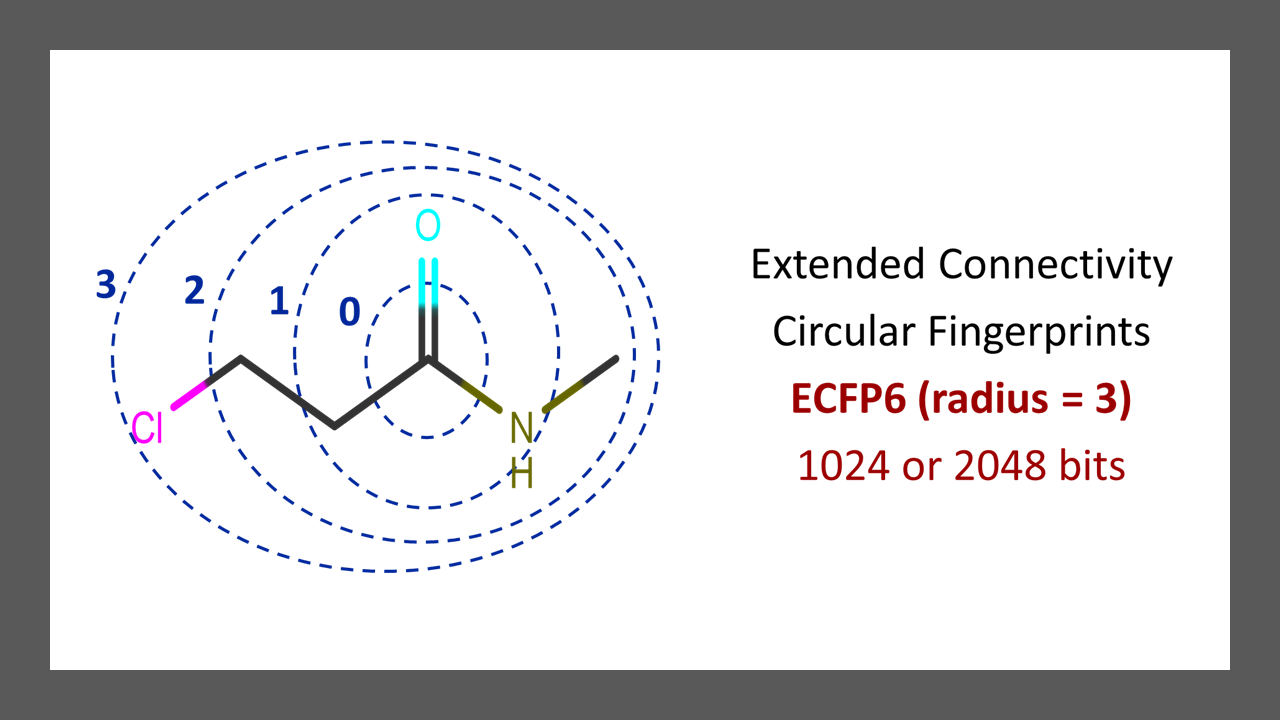

In [73]:
Image('assets/ecfp_1.png', width=600, height=600)

In [34]:
model = dc.models.MultitaskRegressor(n_tasks=1,
n_features=1024,
layer_sizes=[1000])

2023-03-15 23:58:20.031668: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-03-15 23:58:20.031722: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-16-63-55.ec2.internal): /proc/driver/nvidia/version does not exist
2023-03-15 23:58:20.032558: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<ol>
  <p>Parameters:</p>
  <li>n_features.</li>
  <p> The number of input features</p>
  <li>layer_sizes:.</li>
  <p>The size of the fully connected layer </p>
  <li>n_tasks:</li>
  <p> the number of tasks</p>
</ol>



In [35]:
model.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1024)]       0           []                               
                                                                                                  
 dense (Dense)                  (None, 1000)         1025000     ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 switched_dropout (SwitchedDrop  (None, 1000)        0           ['dense[0][0]',                  
 out)                                                             'input_2[0][0]']            

In [37]:
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='ECFP')
train_dataset, valid_dataset, test_dataset = datasets


In [38]:
model.fit(train_dataset)

0.6924617004394531

In [39]:
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)

In [40]:
train_scores = model.evaluate(train_dataset, [metric], transformers)
test_scores = model.evaluate(test_dataset, [metric], transformers)

In [41]:
print(train_scores)

{'pearson_r2_score': 0.8239054390881512}


In [42]:
print(test_scores)

{'pearson_r2_score': 0.45822230799940794}


In [43]:
predicted = model.predict(test_dataset, transformers)

#### GCN

In [ ]:
# https://arxiv.org/abs/1603.00856

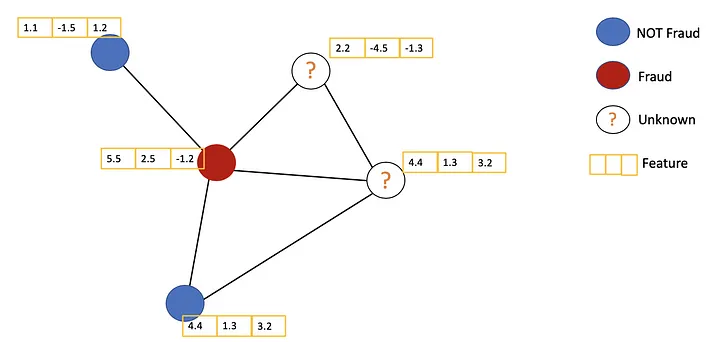

In [92]:
Image('assets/GNN.png')

In [93]:
tasks, datasets, transformers = dc.molnet.load_delaney()


In [94]:
datasets[0].X.shape

(902, 1024)

Solubility is the maximum amount of a substance that can be dissolved by a solvent at a given physical condition. Solubility is a property of chemical entities, which ranges from infinitely soluble to poorly soluble. Solubility depends on the physical and chemical properties of the solute and solvent.

In [44]:
# Train a neural network to predict the solubility of molecules.  First load the data.
# Ref: https://distill.pub/2021/gnn-intro/
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='GraphConv')
train_dataset, valid_dataset, test_dataset = datasets


In [45]:
for (xi, yi, wi, idi) in train_dataset.itersamples():
    print(xi)
    break

In [46]:
xi.n_atoms

11

In [47]:
xi.get_atom_features()

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0.

In [48]:
xi.get_adjacency_list()

[[9],
 [10],
 [4],
 [9],
 [6, 2],
 [7, 10],
 [10, 4],
 [8, 5],
 [9, 7],
 [0, 3, 8],
 [5, 1, 6]]

In [50]:
# Create and train the model.
model = dc.models.GraphConvModel(n_tasks=1, mode='regression', dropout=0.2)
model.model.summary()

Model: "private__graph_conv_keras_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 graph_conv (GraphConv)      multiple                  102144    
                                                                 
 graph_conv_1 (GraphConv)    multiple                  87360     
                                                                 
 batch_normalization (BatchN  multiple                 256       
 ormalization)                                                   
                                                                 
 batch_normalization_1 (Batc  multiple                 256       
 hNormalization)                                                 
                                                                 
 batch_normalization_2 (Batc  multiple                 512       
 hNormalization)                                                 
                                   

In [49]:
model.fit(train_dataset, nb_epoch=100)

0.11014050483703614

In [66]:
# Evaluate it.

metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)
print("Training set score")
print(model.evaluate(train_dataset, [metric], transformers))
print("Test set score")
print(model.evaluate(test_dataset, [metric], transformers))

# Use it to predict the solubility of some molecules.

smiles = ['COC(C)(C)CCCC(C)CC=CC(C)=CC(=O)OC(C)C',
          'CCOC(=O)CC',
          'CSc1nc(NC(C)C)nc(NC(C)C)n1',
          'CC(C#C)N(C)C(=O)Nc1ccc(Cl)cc1',
          'Cc1cc2ccccc2cc1C']
from rdkit import Chem
mols = [Chem.MolFromSmiles(s) for s in smiles]
featurizer = dc.feat.ConvMolFeaturizer()
x = featurizer.featurize(mols)
predicted_solubility = model.predict_on_batch(x)
for m,s in zip(smiles, predicted_solubility):
    print()
    print('Molecule:', m)
    print('Predicted solubility:', s)

Training set score
{'pearson_r2_score': 0.9059922981161767}
Test set score
{'pearson_r2_score': 0.6375420165259792}

Molecule: COC(C)(C)CCCC(C)CC=CC(C)=CC(=O)OC(C)C
Predicted solubility: [-0.5781958]

Molecule: CCOC(=O)CC
Predicted solubility: [1.6277117]

Molecule: CSc1nc(NC(C)C)nc(NC(C)C)n1
Predicted solubility: [-0.04411773]

Molecule: CC(C#C)N(C)C(=O)Nc1ccc(Cl)cc1
Predicted solubility: [0.08592789]

Molecule: Cc1cc2ccccc2cc1C
Predicted solubility: [-0.33509737]


## Genomic Prediction

#### Prediction of Chrom Accessbility

In [95]:
! mkdir data/DNABinding
! unzip data/dnabinding.zip -d data/DNABinding

Archive:  data/dnabinding.zip
 extracting: data/DNABinding/test_dataset/metadata.csv.gzip  
  inflating: data/DNABinding/test_dataset/shard-0-ids.joblib  
  inflating: data/DNABinding/test_dataset/shard-0-w.joblib  
  inflating: data/DNABinding/test_dataset/shard-0-X.joblib  
  inflating: data/DNABinding/test_dataset/shard-0-y.joblib  
 extracting: data/DNABinding/test_dataset/tasks.json  
 extracting: data/DNABinding/train_dataset/metadata.csv.gzip  
  inflating: data/DNABinding/train_dataset/shard-0-ids.joblib  
  inflating: data/DNABinding/train_dataset/shard-0-w.joblib  
  inflating: data/DNABinding/train_dataset/shard-0-X.joblib  
  inflating: data/DNABinding/train_dataset/shard-0-y.joblib  
 extracting: data/DNABinding/train_dataset/tasks.json  
 extracting: data/DNABinding/valid_dataset/metadata.csv.gzip  
  inflating: data/DNABinding/valid_dataset/shard-0-ids.joblib  
  inflating: data/DNABinding/valid_dataset/shard-0-w.joblib  
  inflating: data/DNABinding/valid_dataset/shard-

In [51]:
# Load the data.
train = dc.data.DiskDataset('data/DNABinding/train_dataset/')
valid = dc.data.DiskDataset('data/DNABinding/test_dataset/')



In [52]:
# get the image
Image(url="assets/accessiblity.jpg", width=600, height=600)

Chromatin is the complex of DNA and proteins that make up the chromosomes in a cell's nucleus. Chromatin can be more or less accessible, depending on the presence of specific proteins and chemical modifications. When chromatin is highly accessible, it is more likely to be transcribed into RNA. When it is less accessible, transcription is less likely to occur.

In [53]:
import deepchem as dc
import tensorflow as tf
import tensorflow.keras.layers as layers


### Build Model

In [54]:
features = tf.keras.Input(shape=(101, 4))
prev = features
for i in range(3):
    prev = layers.Conv1D(filters=15, kernel_size=10, activation=tf.nn.relu, padding='same')(prev)
    prev = layers.Dropout(rate=0.5)(prev)
logits = layers.Dense(units=1)(layers.Flatten()(prev))
output = layers.Activation(tf.math.sigmoid)(logits)
keras_model = tf.keras.Model(inputs=features, outputs=[output, logits])
model = dc.models.KerasModel(
    keras_model,
    loss=dc.models.losses.SigmoidCrossEntropy(),
    output_types=['prediction', 'loss'],
    batch_size=1000,
    model_dir='tf')

In [55]:
model.model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 101, 4)]          0         
                                                                 
 conv1d (Conv1D)             (None, 101, 15)           615       
                                                                 
 dropout_3 (Dropout)         (None, 101, 15)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 101, 15)           2265      
                                                                 
 dropout_4 (Dropout)         (None, 101, 15)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 101, 15)           2265      
                                                                 
 dropout_5 (Dropout)         (None, 101, 15)           0   

In [56]:
DNA_str = 'ACGT'
''.join([DNA_str[i] for i in train.X[0].argmax(axis=-1).tolist()])

'ATAAAAGCCCAGAACTATGCCATGTATAGTAGGGCATATGAAAGAAATATAGGATGGTCCCTGTCCTCTAGGAGCTTACACTCTTACTGGAGAGACAAGAT'

In [57]:
np.bincount(train.y.astype(int).flatten())

array([275048,   1168])

In [58]:
# Train the model, tracking its performance on the training and validation datasets.

metric = dc.metrics.Metric(dc.metrics.roc_auc_score)
model.fit(train, nb_epoch=1)
eval_res = model.evaluate(train, [metric])
print(eval_res)

{'roc_auc_score': 0.5129953414669239}
